In [7]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Importing the dataset
train = pd.read_csv('titanic_train.csv')

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
'''
Logistic regression does not make many of the key assumptions of linear
regression and general linear models that are based on ordinary least squares
algorithms – particularly regarding linearity, normality, homoscedasticity,
and measurement level.
 
First, logistic regression does not require a linear relationship between the
dependent and independent variables.  
Second, the error terms (residuals)  do not need to be normally distributed.
Third, homoscedasticity is not  required.  Finally, the dependent variable 
in logistic regression is not measured on an interval or ratio scale. 
'''

'\nLogistic regression does not make many of the key assumptions of linear\nregression and general linear models that are based on ordinary least squares\nalgorithms – particularly regarding linearity, normality, homoscedasticity,\nand measurement level.\n \nFirst, logistic regression does not require a linear relationship between the\ndependent and independent variables.  \nSecond, the error terms (residuals)  do not need to be normally distributed.\nThird, homoscedasticity is not  required.  Finally, the dependent variable \nin logistic regression is not measured on an interval or ratio scale. \n'

C:\Users\PR269KB\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

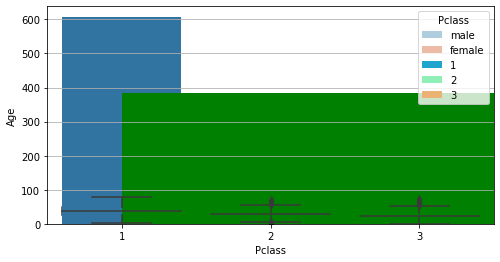

In [11]:
#EDA
sns.countplot(x='Survived',data=train,palette='RdBu_r')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.countplot(x='SibSp',data=train)
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [12]:
'''
Binary logistic regression requires the dependent variable to be binary
and ordinal logistic regression requires the dependent variable to be ordinal.

Logistic regression requires the observations to be independent of each
other.  In other words, the observations should not come from repeated
measurements or matched data.
 
Logistic regression typically requires a large sample size. 
A general guideline is that you need at minimum of 10 cases with the least 
frequent outcome for each independent variable in your model. For example, 
if you have 5 independent variables and the expected probability of your 
least frequent outcome is .10, then you would need a minimum sample 
size of 500 (10*5 / .10).
'''

'\nBinary logistic regression requires the dependent variable to be binary\nand ordinal logistic regression requires the dependent variable to be ordinal.\n\nLogistic regression requires the observations to be independent of each\nother.  In other words, the observations should not come from repeated\nmeasurements or matched data.\n \nLogistic regression typically requires a large sample size. \nA general guideline is that you need at minimum of 10 cases with the least \nfrequent outcome for each independent variable in your model. For example, \nif you have 5 independent variables and the expected probability of your \nleast frequent outcome is .10, then you would need a minimum sample \nsize of 500 (10*5 / .10).\n'

<AxesSubplot:>

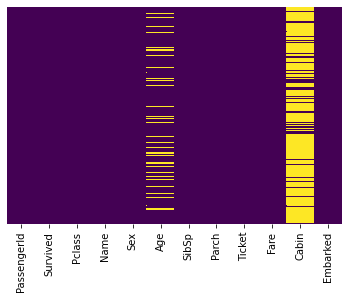

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Taking care of missing data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].iloc[0]

        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].iloc[1]

        else:
            return train.groupby('Pclass').mean()['Age'].iloc[2]

    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

In [16]:
'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset['Age'].values.reshape(-1, 1))
dataset['Age'] = imputer.transform(dataset['Age'].values.reshape(-1, 1))'''

"\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\nimputer = imputer.fit(dataset['Age'].values.reshape(-1, 1))\ndataset['Age'] = imputer.transform(dataset['Age'].values.reshape(-1, 1))"

In [17]:
X = train.iloc[:, [2, 4, 5, 6, 7, 9, 10]]
y = train.iloc[:, 1]

In [18]:
'''No multicolinearity - also check for condition number
Logistic regression requires there to be little or no multicollinearity
 among the independent variables.  This means that the independent variables
 should not be too highly correlated with each other.
 
We observe it when two or more variables have a high coorelation.
If a can be represented using b, there is no point using both
c and d have a correlation of 90% (imprefect multicolinearity). if c can be almost
represented using d there is no point using both
FIX : a) Drop one of the two variables. b) Transform them into one variable by taking
mean. c) Keep them both but use caution. 
Test : before creating the model find correlation between each pairs.
'''
multicolinearity_check = train.corr()

In [19]:
# Encoding categorical data
sex = pd.get_dummies(X['Sex'], prefix = 'Sex')
sex.drop('Sex_male', inplace = True, axis=1)

embark = pd.get_dummies(X['Embarked'], prefix = 'Embarked', drop_first=True)

passenger_class = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
passenger_class.drop('Pclass_3', inplace = True, axis=1)

X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
X = pd.concat([X,sex,embark, passenger_class],axis=1)

C:\Users\PR269KB\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


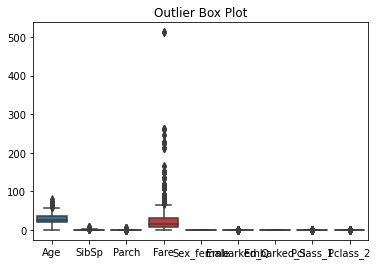

In [20]:
#Outliners
sns.boxplot(data= X).set_title("Outlier Box Plot")

linearity_check_df = pd.concat([pd.DataFrame(X),y],axis=1)

In [22]:
linearity_check_df

,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Survived
0,22.00000,1,0,7.2500,0,0,1,0,0,0
1,38.00000,1,0,71.2833,1,0,0,1,0,1
2,26.00000,0,0,7.9250,1,0,1,0,0,1
3,35.00000,1,0,53.1000,1,0,1,1,0,1
4,35.00000,0,0,8.0500,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,0,0,1,0,1,0
887,19.00000,0,0,30.0000,1,0,1,1,0,1
888,25.14062,1,2,23.4500,1,0,1,0,0,0
889,26.00000,0,0,30.0000,0,0,0,1,0,1


Text(0.5, 1.0, 'Log Odds Linear Plot')

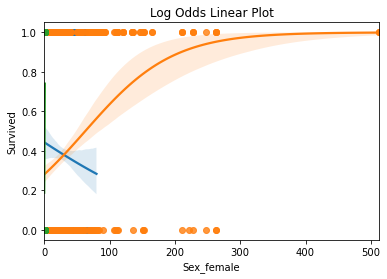

In [23]:
'''
Box-Tidwell test
logistic regression assumes linearity of independent variables and log odds.
 although this analysis does not require the dependent and independent
 variables to be related linearly, it requires that the independent variables
 are linearly related to the log odds.'''
sns.regplot(x= 'Age', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")
sns.regplot(x= 'Fare', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")
sns.regplot(x= 'Sex_female', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
# Feature Scaling #Need to be done after splitting
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0,3]] = sc.fit_transform(X_train.iloc[:, [0,3]])
X_test.iloc[:, [0,3]] = sc.transform(X_test.iloc[:, [0,3]])

C:\Users\PR269KB\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\PR269KB\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [27]:
#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [28]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


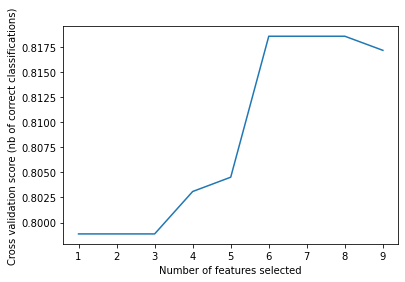

In [29]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [30]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier, rfecv.n_features_, step=1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

# Can select columns based on the returned mask
# X.loc[:, rfe.support_]

[ True  True False False  True False  True  True  True]
[1 1 4 3 1 2 1 1 1]


C:\Users\PR269KB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [32]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,87,15,102
1,26,50,76
All,113,65,178


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       102
           1       0.77      0.66      0.71        76

    accuracy                           0.77       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [35]:
#Genarate Reports
import statsmodels.api as sm

In [36]:
#X_set = X[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2']]
X_set = X.loc[:, rfe.support_]
X_set = sm.add_constant(X_set)

logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.439834
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.339     
Dependent Variable: Survived         AIC:              796.0256  
Date:               2020-12-20 16:26 BIC:              829.5562  
No. Observations:   889              Log-Likelihood:   -391.01   
Df Model:           6                LL-Null:          -591.41   
Df Residuals:       882              LLR p-value:      1.8887e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.7327    0.2868  -2.5546  0.0106  -1.2948  -0.1706
Age           -0.0432    0.0082  -5.2789  0.0000  -0.0593  -0.

In [37]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['OR'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())

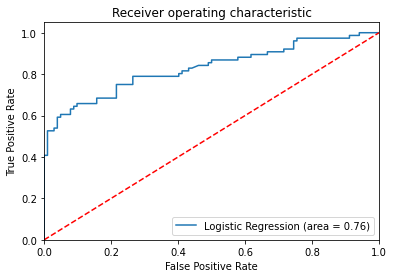

In [38]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()